In [52]:
from cltk.corpus.latin import latinlibrary
import os
#print(latinlibrary)
loc_path="/Users/Sikata/cltk_data/latin/text/latin_text_latin_library"
filenames=[]
lines=!ls $loc_path
for name in lines:
    if name[-3:]=='txt':
        filenames.append(loc_path+'/'+name)
    else:
        lines_dir=!ls /Users/Sikata/cltk_data/latin/text/latin_text_latin_library/$name
        if name[-2:]!='md' and name[-2:]!='py':
            for text in lines_dir:
                filenames.append(loc_path+'/'+name+'/'+text) 
        
        
print(len(filenames))
print(filenames[5])
print(len(latinlibrary.words(filenames[5])))
    

2164
/Users/Sikata/cltk_data/latin/text/latin_text_latin_library/abelard/historia.txt
13863


In [84]:
from cltk.corpus.latin import latinlibrary
import os
#print(latinlibrary)
loc_path="/Users/Sikata/cltk_data/latin/text/latin_text_latin_library"
filenames_short=[]
lines=!ls $loc_path
for name in lines:
    if name[-3:]=='txt':
        filenames_short.append(name)
    else:
        lines_dir=!ls /Users/Sikata/cltk_data/latin/text/latin_text_latin_library/$name
        if name[-2:]!='md' and name[-2:]!='py':
            for text in lines_dir:
                filenames_short.append(name+'/'+text) 
        
        
print(len(filenames_short))
print(filenames_short[5])

    

2164
abelard/historia.txt


In [66]:
#for tokenizing all the texts 
'''from cltk.tokenize.word import WordTokenizer
word_tokenizer = WordTokenizer('latin')
total_tokens=[]
count=0
for filename in filenames: 
    with open(filename) as f:
        r = f.read()
    f.close()
    total_tokens.append(word_tokenizer.tokenize(r))
    print(count)
    count+=1
print(len(total_tokens))'''

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [69]:
#for saving all the tokens 
'''#pickle the tokens 
import pickle 
#os.chdir('/Users/Sikata/Dropbox/12thGradeSchoolWork/Latin_LDA')
with open("/Users/Sikata/Dropbox/12thGradeSchoolWork/Latin_LDA/latin_tokens.txt", "wb") as fp:   #Pickling
    pickle.dump(total_tokens, fp)'''

In [59]:
print(total_tokens[1:3])

['TABULARUM', 'LEGES']


In [71]:
'''import pickle 
import gensim 
from gensim import corpora, similarities, models
with open("/Users/Sikata/Dropbox/12thGradeSchoolWork/Latin_LDA/latin_tokens.txt", "rb") as fp:   # Unpickling
    total_tokens_loaded= pickle.load(fp)
dictionary=corpora.Dictionary(total_tokens_loaded)
corpus=[dictionary.doc2bow(text) for text in total_tokens_loaded]
#print(total_tokens)
print(dictionary)
corpora.MmCorpus.serialize('latin_corp.mm', corpus)
mm = corpora.MmCorpus('latin_corp.mm')
#print(mm)
lda = gensim.models.ldamodel.LdaModel(corpus=mm, id2word=dictionary, num_topics=10, update_every=1, chunksize=10, passes=1)
lda.print_topics(10)
dictionary.save('latin.dict')
lda.save('latin_lda.model')'''

Dictionary(537444 unique tokens: ['DUODECIM', 'TABULARUM', 'LEGES', 'TABULA', 'I']...)


In [74]:
import pyLDAvis.gensim
dictionary = gensim.corpora.Dictionary.load('latin.dict')
corpus = gensim.corpora.MmCorpus('latin_corp.mm')
lda = gensim.models.ldamodel.LdaModel.load('latin_lda.model')
pyLDAvis.enable_notebook()
pyLDAvis.gensim.prepare(lda, corpus, dictionary)

PreparedData(topic_coordinates=            Freq  cluster  topics         x         y
topic                                                
5      24.877278        1       1 -0.133534 -0.101653
7      19.542900        1       2 -0.115791 -0.123039
2      16.040297        1       3 -0.116801 -0.027680
0      13.961355        1       4 -0.211450  0.015522
8       5.697708        1       5 -0.053675  0.173034
4       4.670625        1       6  0.173572 -0.036838
9       4.582990        1       7  0.222162 -0.132212
3       4.456866        1       8  0.019605 -0.143226
1       3.560983        1       9 -0.039919  0.257398
6       2.608998        1      10  0.255830  0.118693, topic_info=       Category          Freq             Term         Total  loglift  logprob
term                                                                          
11      Default  7.467060e+05                .  7.467060e+05  30.0000  30.0000
125     Default  1.345990e+05             -que  1.345990e+05  29.0000  29.0000
76      Default  1.682760e+05                ;  1.682760e+05  28.0000  28.0000
372     Default  4.022940e+05               et  4.022940e+05  27.0000  27.0000
9       Default  1.491765e+06                ,  1.491765e+06  26.0000  26.0000
702     Default  5.622000e+04                ?  5.622000e+04  25.0000  25.0000
208     Default  3.519900e+04                )  3.519900e+04  24.0000  24.0000
171     Default  3.509600e+04                (  3.509600e+04  23.0000  23.0000
45      Default  3.248500e+04                   3.248500e+04  22.0000  22.0000
79      Default  1.166560e+05                :  1.166560e+05  21.0000  21.0000
253     Default  5.434700e+04                ]  5.434700e+04  20.0000  20.0000
251     Default  5.523000e+04                [  5.523000e+04  19.0000  19.0000
695     Default  2.539500e+04                "  2.539500e+04  18.0000  18.0000
83      Default  2.287000e+04               te  2.287000e+04  17.0000  17.0000
691     Default  2.217700e+04               me  2.217700e+04  16.0000  16.0000
295     Default  1.478020e+05              est  1.478020e+05  15.0000  15.0000
246     Default  1.401560e+05              non  1.401560e+05  14.0000  14.0000
6       Default  2.309320e+05               in  2.309320e+05  13.0000  13.0000
405     Default  7.048300e+04               de  7.048300e+04  12.0000  12.0000
74      Default  1.640100e+04                &  1.640100e+04  11.0000  11.0000
84      Default  1.645900e+04             mihi  1.645900e+04  10.0000  10.0000
146     Default  6.757500e+04               si  6.757500e+04   9.0000   9.0000
377     Default  9.648500e+04             quod  9.648500e+04   8.0000   8.0000
177     Default  4.181800e+04            autem  4.181800e+04   7.0000   7.0000
2537    Default  1.570500e+04             tibi  1.570500e+04   6.0000   6.0000
191     Default  1.111470e+05               ad  1.111470e+05   5.0000   5.0000
101     Default  9.081700e+04              cum  9.081700e+04   4.0000   4.0000
103     Default  2.042300e+04             quid  2.042300e+04   3.0000   3.0000
899     Default  4.606100e+04             enim  4.606100e+04   2.0000   2.0000
410     Default  3.123600e+04              -ne  3.123600e+04   1.0000   1.0000
...         ...           ...              ...           ...      ...      ...
143445  Topic10  2.775876e+02              368  2.794785e+02   3.6394  -7.3558
207777  Topic10  1.509279e+03             iiii  1.552579e+03   3.6179  -5.6625
125050  Topic10  9.429710e+02              vii  9.637428e+02   3.6244  -6.1329
142655  Topic10  1.665269e+03              aug  1.734374e+03   3.6055  -5.5642
346087  Topic10  5.170014e+02         ravennae  5.257720e+02   3.6294  -6.7339
16305   Topic10  1.243068e+03               c.  1.288270e+03   3.6105  -5.8566
345491  Topic10  2.056895e+03             mart  2.170819e+03   3.5923  -5.3530
345489  Topic10  3.026117e+03              aaa  3.258396e+03   3.5722  -4.9669
345515  Topic10  1.099833e+03             febr  1.147972e+03   3.6034 

In [75]:
'''lda = gensim.models.ldamodel.LdaModel(corpus=mm, id2word=dictionary, num_topics=30, update_every=1, chunksize=10, passes=1)
lda.save('latin_lda_30.model')'''

In [76]:
import pyLDAvis.gensim
dictionary = gensim.corpora.Dictionary.load('latin.dict')
corpus = gensim.corpora.MmCorpus('latin_corp.mm')
lda = gensim.models.ldamodel.LdaModel.load('latin_lda_30.model')
pyLDAvis.enable_notebook()
pyLDAvis.gensim.prepare(lda, corpus, dictionary)

PreparedData(topic_coordinates=            Freq  cluster  topics         x         y
topic                                                
27     12.866355        1       1  0.274901 -0.071931
11     11.165180        1       2  0.269115  0.038900
6       9.285040        1       3  0.266126 -0.012650
21      8.121862        1       4  0.209062  0.024378
8       6.773038        1       5  0.225575 -0.134614
29      6.599184        1       6  0.208202 -0.095508
24      5.793158        1       7  0.223836  0.166084
7       5.326178        1       8  0.197592  0.160774
4       4.676531        1       9  0.198519  0.050091
3       4.051255        1      10  0.035784 -0.195613
18      3.308757        1      11  0.044892 -0.168516
14      3.144469        1      12  0.197872  0.064986
22      2.921492        1      13  0.143542  0.166966
19      2.631898        1      14  0.116899 -0.112729
28      2.402353        1      15  0.032916 -0.163384
5       1.436397        1      16 -0.049578  0.017452
0       1.382481        1      17  0.021692 -0.017350
26      1.067995        1      18 -0.026243  0.219150
2       1.025652        1      19 -0.134600  0.068021
17      0.958446        1      20 -0.125804  0.039399
23      0.933078        1      21 -0.168706 -0.048480
20      0.890969        1      22 -0.119258 -0.070059
25      0.593766        1      23 -0.278559  0.017032
15      0.527900        1      24 -0.202582 -0.000440
12      0.461918        1      25 -0.244034 -0.000462
9       0.426520        1      26 -0.245997  0.007828
16      0.404993        1      27 -0.250492  0.006122
1       0.326227        1      28 -0.261302  0.020124
10      0.307356        1      29 -0.269218  0.007302
13      0.189554        1      30 -0.290152  0.017127, topic_info=       Category          Freq              Term         Total  loglift  \
term                                                                     
11      Default  7.591450e+05                 .  7.591450e+05  30.0000   
9       Default  1.464082e+06                 ,  1.464082e+06  29.0000   
251     Default  5.518100e+04                 [  5.518100e+04  28.0000   
253     Default  5.504000e+04                 ]  5.504000e+04  27.0000   
76      Default  1.663370e+05                 ;  1.663370e+05  26.0000   
125     Default  1.245450e+05              -que  1.245450e+05  25.0000   
372     Default  4.231910e+05                et  4.231910e+05  24.0000   
45      Default  3.827100e+04                    3.827100e+04  23.0000   
79      Default  1.201320e+05                 :  1.201320e+05  22.0000   
208     Default  3.076200e+04                 )  3.076200e+04  21.0000   
171     Default  3.077900e+04                 (  3.077900e+04  20.0000   
695     Default  2.849900e+04                 "  2.849900e+04  19.0000   
702     Default  5.615200e+04                 ?  5.615200e+04  18.0000   
295     Default  1.553660e+05               est  1.553660e+05  17.0000   
942     Default  2.889900e+04               vel  2.889900e+04  16.0000   
246     Default  1.431260e+05               non  1.431260e+05  15.0000   
691     Default  2.270900e+04                me  2.270900e+04  14.0000   
83      Default  2.321800e+04                te  2.321800e+04  13.0000   
6       Default  2.456560e+05                in  2.456560e+05  12.0000   
59315   Default  2.264700e+04                 '  2.264700e+04  11.0000   
410     Default  3.209700e+04               -ne  3.209700e+04  10.0000   
377     Default  9.968500e+04              quod  9.968500e+04   9.0000   
84      Default  1.673700e+04              mihi  1.673700e+04   8.0000   
74      Default  1.752600e+04                 &  1.752600e+04   7.0000   
2537    Default  1.607300e+04              tibi  1.607300e+04   6.0000   
405     Default  6.987900e+04                de  6.987900e+04   5.0000   
191     Default  1.206560e+05                ad  1.206560e+05   4.0000   
899     Default  4.716900e+04              enim  4.716900e+04   3.0000   
215     D

In [77]:
import numpy as np
theta,_=lda.inference(mm)
prob_topic=lda.get_document_topics(mm,minimum_probability=.00000000000001)
np.shape(theta)

(2164, 30)

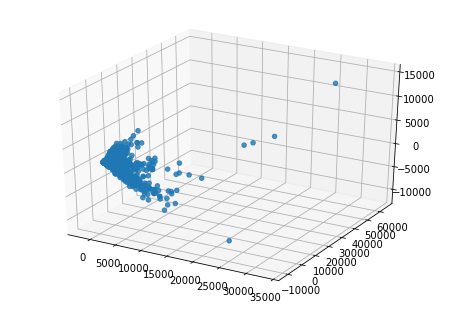

In [78]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

pca=PCA(n_components=3)
components=pca.fit_transform(theta)

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(components[:,0], components[:,1],components[:,2], alpha=0.8)
plt.show()

In [81]:
import scipy.stats as scst
def jsd(P,Q):
    M=(P+Q)/2
    return (scst.entropy(P,M)+scst.entropy(Q,M))/2
def jsd_mat(prob_mat):
    ndoc=np.shape(prob_mat)[0]
    dist=np.zeros((ndoc,ndoc))
    for i in range(ndoc):
        for j in range(ndoc):
            dist[i,j]=jsd(prob_mat[i,:],prob_mat[j,:])
    return dist

In [82]:
norm=theta.sum(axis=1)
l=np.shape(norm)[0]
normtheta=theta/norm.reshape(l,1)
dist_user=np.sqrt(jsd_mat(normtheta))

<IPython.core.display.Javascript object>


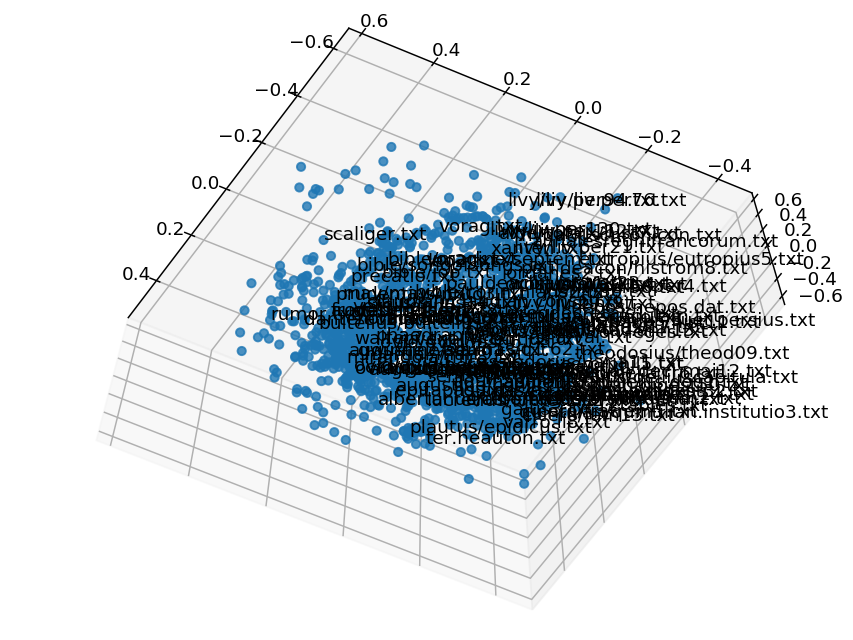

In [100]:
%matplotlib notebook
import os  # for os.path.basename

import matplotlib.pyplot as plt

from sklearn.manifold import MDS

# two components as we're plotting points in a two-dimensional plane
# "precomputed" because we provide a distance matrix
# we will also specify `random_state` so the plot is reproducible.
mds = MDS(n_components=3, dissimilarity="precomputed", random_state=1)

pos = mds.fit_transform(dist_user)  # shape (n_components, n_samples)
xs, ys, zs = pos[:, 0], pos[:, 1],pos[:,2]


fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(xs, ys, zs, alpha=.8)
#labels=range(len(xs))
count=0
for i in range(len(xs)):
    if count%20==0:
        label = filenames_short[i]
    else: 
        label=''
    ax.text(xs[i],ys[i],zs[i],label)
    count+=1

#labels=[str(label) for label in labels]


plt.show()

<IPython.core.display.Javascript object>


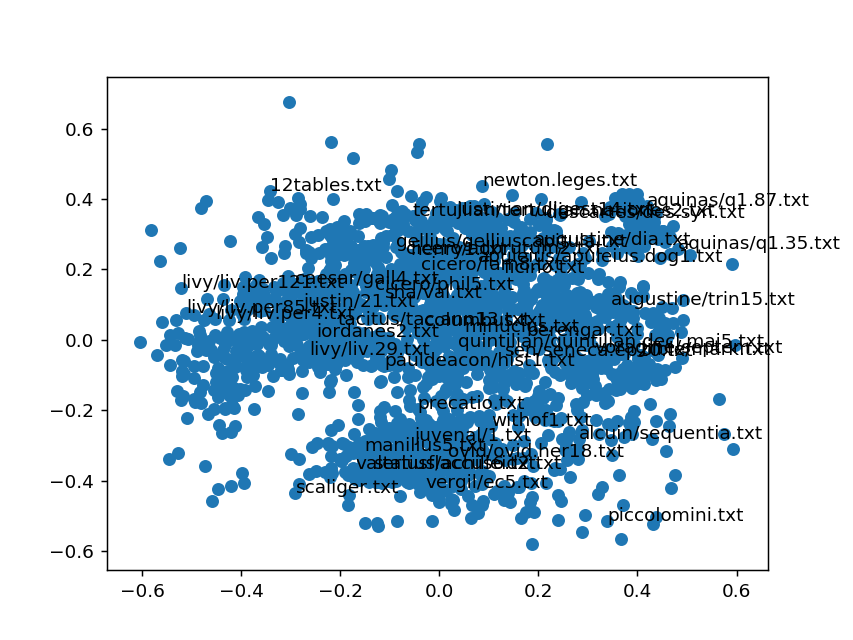

In [99]:
%matplotlib notebook
import os  # for os.path.basename

import matplotlib.pyplot as plt

from sklearn.manifold import MDS

# two components as we're plotting points in a two-dimensional plane
# "precomputed" because we provide a distance matrix
# we will also specify `random_state` so the plot is reproducible.
mds = MDS(n_components=2, dissimilarity="precomputed", random_state=1)

pos = mds.fit_transform(dist_user)  # shape (n_components, n_samples)
xs, ys = pos[:, 0], pos[:, 1]

'''fig = plt.figure()
count=0
for i in range(len(xs)):
    if count%20==0:
        plt.scatter(xs[i],ys[i],label=filenames_short[i])
    else: 
        plt.scatter(xs[i],ys[i])
    
    count+=1'''
count=0
name_copy=[]
for name in filenames_short: 
    if count%50==0:
        name_copy.append(name)
    else: 
        name_copy.append('')
    count+=1
fig, ax = plt.subplots()
ax.scatter(xs, ys)

for i, txt in enumerate(name_copy):
    ax.annotate(txt, (xs[i],ys[i]))


#labels=[str(label) for label in labels]


plt.show()

In [94]:
print(filenames_short)

['12tables.txt', '1644.txt', 'abbofloracensis.txt', 'abelard/dialogus.txt', 'abelard/epistola.txt', 'abelard/historia.txt', 'addison/barometri.txt', 'addison/burnett.txt', 'addison/hannes.txt', 'addison/machinae.txt', 'addison/pax.txt', 'addison/praelium.txt', 'addison/preface.txt', 'addison/resurr.txt', 'addison/sphaer.txt', 'adso.txt', 'aelredus.txt', 'agnes.txt', 'alanus/alanus1.txt', 'alanus/alanus2.txt', 'albertanus/albertanus.arsloquendi.txt', 'albertanus/albertanus.liberconsol.txt', 'albertanus/albertanus.sermo.txt', 'albertanus/albertanus.sermo1.txt', 'albertanus/albertanus.sermo2.txt', 'albertanus/albertanus.sermo3.txt', 'albertanus/albertanus.sermo4.txt', 'albertanus/albertanus1.txt', 'albertanus/albertanus2.txt', 'albertanus/albertanus3.txt', 'albertanus/albertanus4.txt', 'albertofaix/hist1.txt', 'albertofaix/hist10.txt', 'albertofaix/hist11.txt', 'albertofaix/hist12.txt', 'albertofaix/hist2.txt', 'albertofaix/hist3.txt', 'albertofaix/hist4.txt', 'albertofaix/hist5.txt', 'al